In [67]:
from rdkit import Chem, DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import AllChem
import io
import MDAnalysis as mda
import pandas as pd
import numpy as np
import glob
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG, display
import warnings
import rdkit.Chem.Draw
#fncache = glob.glob('/mnt/c/Users/guido/data/qm9/coord/*/*/*.xyz')
fullsearch = pd.read_csv('fullsearch', names='fn i j dist gap molsim'.split(), sep=' ')
fullsearch['absgap'] = abs(fullsearch.gap)

In [17]:
def xyz_to_pdb_block(filename):
    warnings.simplefilter("ignore")
    u = mda.Universe(filename)
    fn = mda.lib.util.NamedStream(io.StringIO(), 'tmp.pdb')
    with mda.Writer(fn, u.atoms.n_atoms, multiframe=False) as W:
        W.write(u.atoms)
    return fn.read()
def xyz_to_2Dmol(filename):
    mol = Chem.MolFromPDBBlock(xyz_to_pdb_block(filename), sanitize=False, removeHs=False)
    AllChem.Compute2DCoords(mol)
    #return mol
    return Chem.rdmolops.RemoveHs(mol)

In [18]:
molA = xyz_to_2Dmol('/mnt/c/Users/guido/data/qm9/coord/95/23/dsgdb9nsd_090230.xyz')
molB = xyz_to_2Dmol('/mnt/c/Users/guido/data/qm9/coord/db/58/dsgdb9nsd_097713.xyz')

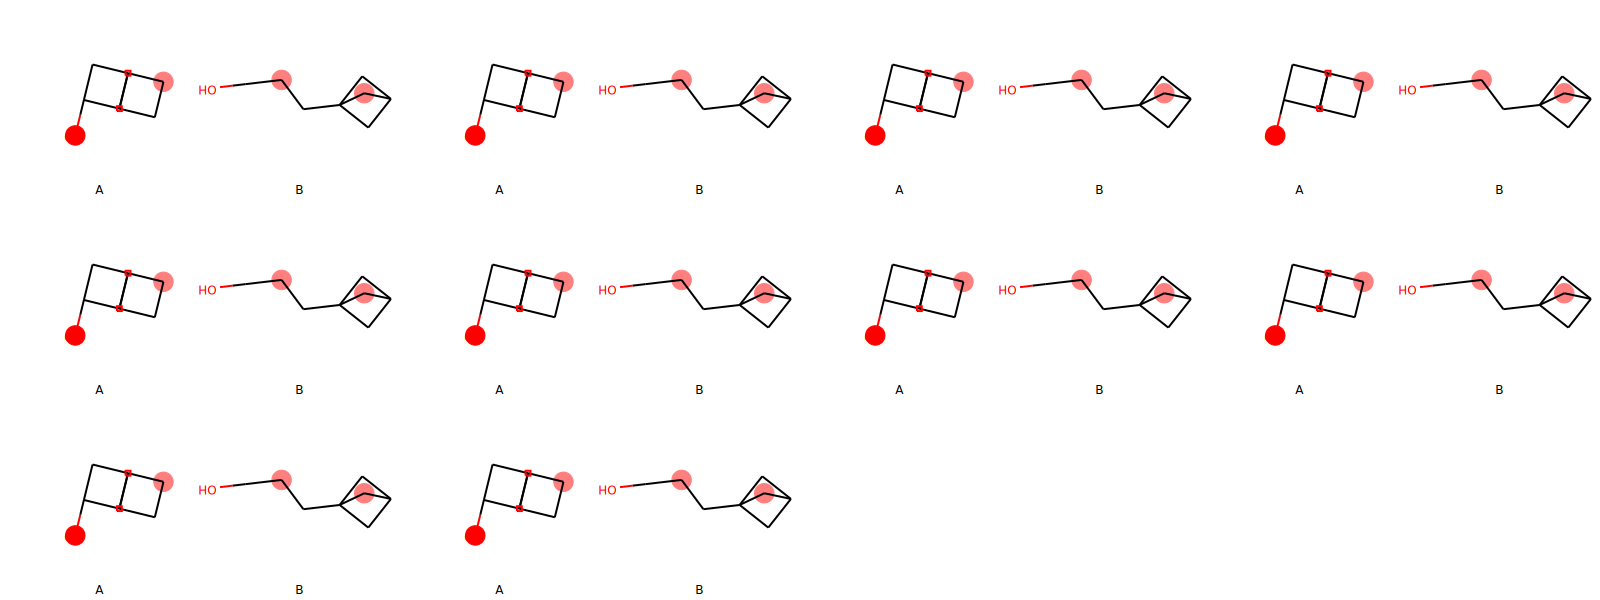

In [19]:
Chem.Draw.MolsToGridImage([molA, molB]*10, molsPerRow=8, subImgSize=(200, 200), legends='A B'.split()*10, highlightAtomLists=[[0, 4], [2, 8]]*10, useSVG=True, highlightAtomColors=[{0:(1,0,0)}]*20)

In [149]:
s = fullsearch.query('molsim > 3 & absgap > 0.00001 & absgap < 0.005').sort_values('molsim', ascending=False).head(15).sort_values('absgap')
s

s = fullsearch[fullsearch.index.isin([5442,1956,3602,4702,2676,5683,142,3448,3810,1240,4583,2426,1539,3402,4333])]
s

,fn,i,j,dist,gap,molsim,absgap
142,028121.xyz,3,4,0.172132,0.003698,60.646859,0.003698
1240,081651.xyz,6,7,0.088286,0.004843,31.563678,0.004843
1539,072738.xyz,3,5,0.262466,-0.002405,34.745153,0.002405
1956,039552.xyz,7,8,0.903602,0.000161,48.925162,0.000161
2426,007455.xyz,2,7,0.583692,-0.003606,31.097939,0.003606
2676,037324.xyz,4,5,0.600829,-0.001385,45.521825,0.001385
3402,083007.xyz,5,6,0.597636,0.000619,36.211174,0.000619
3448,041859.xyz,0,3,0.842379,0.004628,42.416953,0.004628
3602,039049.xyz,1,2,0.816986,0.000738,58.787100,0.000738
3810,066728.xyz,3,4,0.302479,-0.004104,37.001477,0.004104


In [150]:
def get_mol(fn):
    return xyz_to_2Dmol([_ for _ in fncache if _.endswith(fn)][0])

In [151]:
mols = [get_mol(_) for _ in s.fn.values]
legend = ['%5.2f' % (_*627.509) for _ in s.gap.values]
#legend = [str(__) for __, _ in s.iterrows()]
highlightatoms = [[_.i, _.j] for __, _ in s.iterrows()]
draw = Chem.Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(150, 150), legends=legend, highlightAtomLists=highlightatoms, useSVG=True, highlightAtomColors=[{0:(1,0,0)}]*len(s))

In [110]:
#15 cases with different topology
5442,1956,3602,4702,2676,5683,142,3448,3810,1240,4583,2426,1539,3402,4333

# 15 cases with large dissimilarity due to configuration albeit symmetric
2236, 2995, 4266, 2876, 3602, 3795, 1943, 5683, 3781, 5165, 3796, 2871, 3799,  142, 5699

0.004761904761904762

In [152]:
with open('15top.svg', 'w') as fh:
    fh.write(draw.data)
